<div class="alert alert-info">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Week 03: Machine Learning with Scikit Learn</h3>

</div>

# Objectives

- A quick review of machine learning.
- Introducing scikit learn package.
- Representing and visualizing data in scikit learn.
- Working with different datasets such as Iris, Digits, Faces datasets.
- A Preview on machine learning using scikit learn.

# Machine Learning

- The process of extracting knowledge from data automatically, usually with the goal of making prediction on new (unseen) data.
- Examples: spam filtering, face recognition, house price prediction, [topic modeling](http://dig-eh.org/dig-eh/TopicModelling/RectangularNodes/), etc.

<table width="100%">
    <tr>
        <td><img src="http://www.snrazavi.ir/imgs/spam2.jpeg" width="50%"/></td>
        <td><img src="http://www.snrazavi.ir/imgs/face_recognition.jpeg" width="100%"/></td>
        <td><img src="http://www.snrazavi.ir/imgs/house_price.jpeg" width="70%"/></td>
    </tr>
</table>

### Supervised Learning: Regression and Classification

- We have a set of Training Data in the form:
#### $$\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots (x^{(n)}, y^{(n)}) \}$$
- We want to learn a function:
#### $$h:X \to Y$$

- **In classification, the label is discrete**, such as "spam" or "no spam". 
- **In regression, the label is continuous**, that is a float output. 

<img src="http://www.snrazavi.ir/imgs/supervised_workflow.svg" width="60%"/>

### Unsupervised Learning: Clustering, Dimensionality Reduction and Density Estimation

 - In **Unsupervised Learning** there is no desired output associated with the data.
 - Instead, we are interested in extracting some form of knowledge or model from the given data.

Sometimes the two may even be combined: e.g. unsupervised learning can be used to find useful features in heterogeneous data, and then these features can be used within a supervised framework.

<img src="http://www.snrazavi.ir/imgs/ml_taxonomy.png" width="75%"/>

# Representation and Visualization of Data

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

We represent samples (data points or instances) as rows in the data array, and we store the corresponding features, the "dimensions," as columns.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different iris flower species.  There are three different species of iris
in this particular dataset as illustrated below:

Iris Setosa
<img src="http://www.snrazavi.ir/imgs/iris_setosa.jpg" width="30%">

Iris Versicolor
<img src="http://www.snrazavi.ir/imgs/iris_versicolor.jpg" width="30%">

Iris Virginica
<img src="http://www.snrazavi.ir/imgs/iris_virginica.jpg" width="30%">

### Loading the Iris Data with Scikit-learn

For future experiments with machine learning algorithms, we recommend you to bookmark the [UCI machine learning repository](http://archive.ics.uci.edu/ml/), which hosts many of the commonly used datasets that are useful for benchmarking machine learning algorithms -- a very popular resource for machine learning practioners and researchers. Conveniently, some of these datasets are already included in scikit-learn so that we can skip the tedious parts of downloading, reading, parsing, and cleaning these text/CSV files. You can find a list of available datasets in scikit-learn at: http://scikit-learn.org/stable/datasets/#toy-datasets.

For example, scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- **Features** in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm


- **Target classes** to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="http://www.snrazavi.ir/imgs/iris.png" width="70%"/>

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

We can see what's available using the method ``keys()``:

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [3]:
print(iris.data.shape)

(150, 4)


In [4]:
n_samples, n_features = iris.data.shape
print('Number of samples:  %d' % n_samples)
print('Number of features: %d' % n_features)

Number of samples:  150
Number of features: 4


In [5]:
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [6]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
import numpy as np

print(np.unique(iris.target, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


Using the `np.unique()` function (above), we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize one or two of the dimensions
at a time using a simple histogram or scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

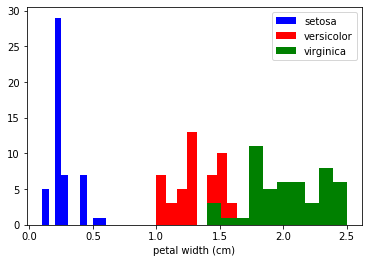

In [11]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):  # [(0, 'blue'), (1, 'red'), (2, 'green')]
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

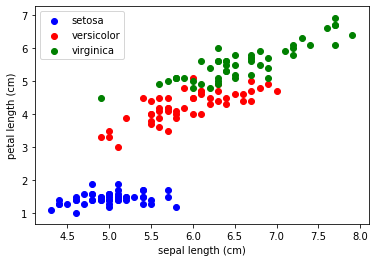

In [12]:
x1_index = 0
x2_index = 2

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x1_index], 
                iris.data[iris.target==label, x2_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x1_index])
plt.ylabel(iris.feature_names[x2_index])
plt.legend(loc='upper left')
plt.show()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      **Change** `x1_index` **and** `x2_index` **in the above script and find a combination of two parameters
which maximally separate the three classes.**
      </li>
      <li>
      This exercise is a preview of **dimensionality reduction**, which we'll see later.
      </li>
    </ul>
</div>

### An aside: scatterplot matrices

Instead of looking at the data one plot at a time, a common tool that analysts use is called the **scatterplot matrix**.

Scatterplot matrices show scatter plots between all features in the data set, as well as histograms to show the distribution of each feature.

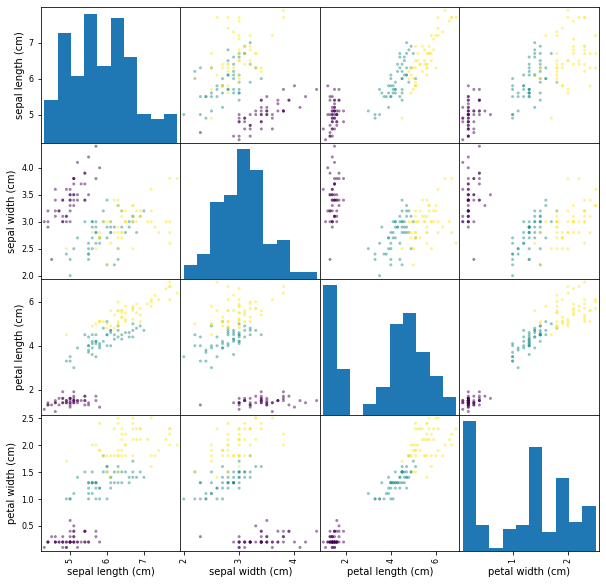

In [13]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(10, 10));

## Other Available Data

[Scikit-learn makes available a host of datasets for testing learning algorithms](http://scikit-learn.org/stable/datasets/#dataset-loading-utilities).
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>

to see a list of available functions.

In [14]:
from sklearn import datasets

**Warning!**: many of these datasets are quite large, and can take a long time to download!

## Loading Digits Data

<img src='http://www.snrazavi.ir/imgs/digits.png' width='50%'/>

Now we'll take a look at another dataset, one where we have to put a bit more thought into how to represent the data.  We can explore the data in a similar manner as above:

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

In [16]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [17]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [18]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


The target here is just the digit represented by the data.  The data is an array of length 64... but what does this data mean?

In [19]:
print(digits.target)

[0 1 2 ... 8 9 8]


There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [20]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


We can see that they're related by a simple reshaping:

In [21]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Let's visualize the data.  It's little bit more involved than the simple scatter-plot we used above, but we can do it rather quickly.

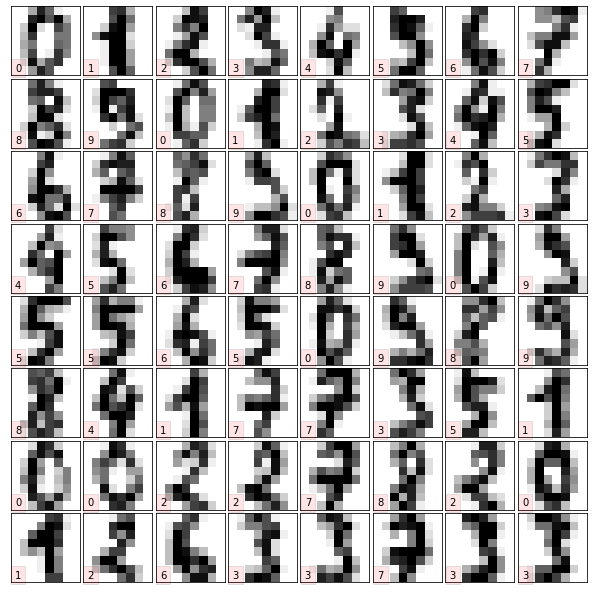

In [22]:
# set up the figure
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]), bbox=dict(facecolor='red', alpha=0.1))

We see now what the features mean.  Each feature is a real-valued quantity representing the
darkness of a pixel in an 8x8 image of a hand-written digit.

Even though each sample has data that is inherently two-dimensional, the data matrix flattens
this 2D data into a **single vector**, which can be contained in one **row** of the data matrix.

<div class="alert alert-success">
    <b>EXERCISE: working with the faces dataset</b>:
     <ul>
      <li>
      Here we'll take a moment for you to explore the datasets yourself.
Later on we'll be using the Olivetti faces dataset.
Take a moment to fetch the data (about 1.4MB), and visualize the faces.
You can copy the code used to visualize the digits above, and modify it for this data.
      </li>
    </ul>
</div>

## Olivetti faces dataset

- There are 40 persons (number of classes)
- For each person, there are 10 pictures of size 64x64. (number of features)

<img src='http://www.snrazavi.ir/imgs/faces.png' width='50%'>

In [23]:
from sklearn.datasets import fetch_olivetti_faces

In [24]:
# fetch the faces data


In [25]:
# Use a script like above to plot the faces image data.
# hint: plt.cm.bone is a good colormap for this data


### Solution:

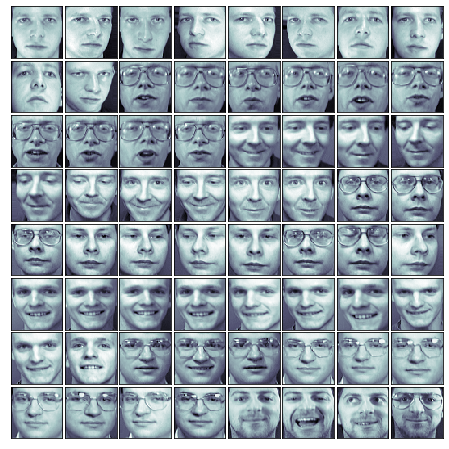

In [26]:
# %load solutions/03A_faces_plot.py
faces = fetch_olivetti_faces()

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces:
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')


# Preview: using `scikitlearn` for Machine Learning

Here, we will use a **Neural Network** to classify data from face dataset in just 4 lines of code!

Assuming that we have our **training** and **test** data, then there are only 4 steps to use `sklearn` for a machine learning task:
1. Import and create your **Estimator** from `sklearn` package.
2. Train the estimator using `fit()` method.
3. Predict on new data using `predict` method.
4. Evaluate the estimator using `metrics` submodule; for example, it's accuracy.

## Classifying faces

In [27]:
# renaming data to simplify code
X, y = faces.data, faces.target

### STEP 1: Import and create the estimator


In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

### STEP 2: Train on the dataset (`fit`)

In [29]:
clf.fit(X, y)

/Users/mahrokh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### STEP 3: Predict for new data

In [74]:
y_pred = clf.predict(X)

### STEP 4: Evaluate (here, the accuracy)

In [70]:
accuracy = np.mean(y_pred == y)
print("accuracy = %.2f" % accuracy)

accuracy = 0.00


/Users/mahrokh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


### Split to Train and Test Data

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# train_test_split?

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
print("Number of training data: %d" % X_train.shape[0])
print("Number of test data: %d" % X_test.shape[0])

Number of training data: 300
Number of test data: 100


In [36]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), verbose=True, max_iter=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 3.84953922
Iteration 2, loss = 3.86831351
Iteration 3, loss = 3.73462706
Iteration 4, loss = 3.70235491
Iteration 5, loss = 3.64582724
Iteration 6, loss = 3.61744806
Iteration 7, loss = 3.59097251
Iteration 8, loss = 3.55965937
Iteration 9, loss = 3.53238525
Iteration 10, loss = 3.48239889
Iteration 11, loss = 3.46808234
Iteration 12, loss = 3.43991935
Iteration 13, loss = 3.39321493
Iteration 14, loss = 3.34758046
Iteration 15, loss = 3.32121290
Iteration 16, loss = 3.26762088
Iteration 17, loss = 3.21749231
Iteration 18, loss = 3.17631863
Iteration 19, loss = 3.12598542
Iteration 20, loss = 3.06654900
Iteration 21, loss = 3.00887487
Iteration 22, loss = 2.96270119
Iteration 23, loss = 2.90085622
Iteration 24, loss = 2.84099651
Iteration 25, loss = 2.77817646
Iteration 26, loss = 2.71472622
Iteration 27, loss = 2.64407929
Iteration 28, loss = 2.60663790
Iteration 29, loss = 2.51746227
Iteration 30, loss = 2.46991264
Iteration 31, loss = 2.38463210
Iteration 32, los

/Users/mahrokh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
print("accuracy = %.2f" %np.mean(y_pred == y_test))

accuracy = 0.92


### Using `metrics` module in `sklearn`

In [38]:
from sklearn.metrics import accuracy_score
print("accuray = %.2f" % accuracy_score(y_test, y_pred))

accuray = 0.92


## Classifying Digits

In [39]:
X, y = digits.data, digits.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# create, train and test the classifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
print("accuray = %.2f" % accuracy_score(y_test, y_pred))

accuray = 0.98


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=digits.target_names)

In [42]:
print(cm)

[[56  0  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  1]
 [ 0  0  0  0 44  0  0  0  0  0]
 [ 1  0  0  0  0 61  0  0  0  1]
 [ 1  0  1  0  1  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  1  0  1  0  0  1  0 47  0]
 [ 0  2  0  2  0  0  0  0  0 49]]


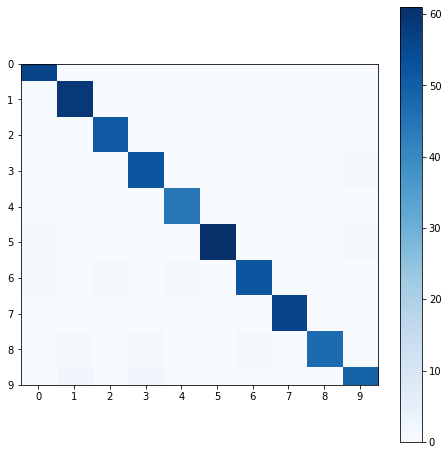

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
plt.show()

<div class="alert alert-success">
    <b>EXERCISE: Training a Neural Network for CIFAR-10 dataset</b>:
     <ul>
      <li>
      By changing the parameters of the MLPClassifier(), try to find the best neural network to classify CIFAR-10 dataset. Use the code from the previous week, to load CIFAR-10 dataset.
      </li>
    </ul>
</div>

## Training and Testing Data in `sklearn`

To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="http://www.snrazavi.ir/imgs/train_test_split_matrix.svg" width="80%">

In [44]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

clf = KNeighborsClassifier()

### K-Nearest Neighbor Classifier
- Please see [this video](https://www.youtube.com/watch?v=DKq4Ut5g0IQ) on youtube for a complete introduction to `KNN`.

<img src='http://www.snrazavi.ir/imgs/knn.png' width="50%"/>

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123)
print("Labels for training and testing data")
print(y_train)
print(y_test)

Labels for training and testing data
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


In [46]:
labels, counts = np.unique(y, return_counts=True)
print(counts / float(len(y)))

[0.33333333 0.33333333 0.33333333]


In [47]:
labels, counts = np.unique(y_train, return_counts=True)
print(counts / float(len(y_train)))

[0.30666667 0.4        0.29333333]


In [48]:
labels, counts = np.unique(y_test, return_counts=True)
print(counts / float(len(y_test)))

[0.36       0.26666667 0.37333333]


### Stratified Split

- Especially for relatively small datasets, it's better to stratify the split. 
- Stratification means that we maintain the original class proportion of the dataset in the test and training sets. 
- For example, after we randomly split the dataset as shown in the previous code example, we have the following class proportions in percent:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123,
                                                    stratify=y)

In [50]:
labels, counts = np.unique(y_train, return_counts=True)
print(counts / float(len(y_train)))

[0.33333333 0.33333333 0.33333333]


In [51]:
labels, counts = np.unique(y_test, return_counts=True)
print(counts / float(len(y_test)))

[0.33333333 0.33333333 0.33333333]


### Train and Test

In [52]:
clf.fit(X_train, y_train)      # train
y_pred = clf.predict(X_test)   # test
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data = %.2f" % (test_accuracy * 100) + " %")

Accuracy on test data = 96.00 %


### Visualize results
We can also visualize the correct and failed predictions

In [53]:
print('Samples correctly classified:')
correct_idx = np.where(y_pred == y_test)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(y_pred != y_test)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Samples incorrectly classified:
[44 49 60]


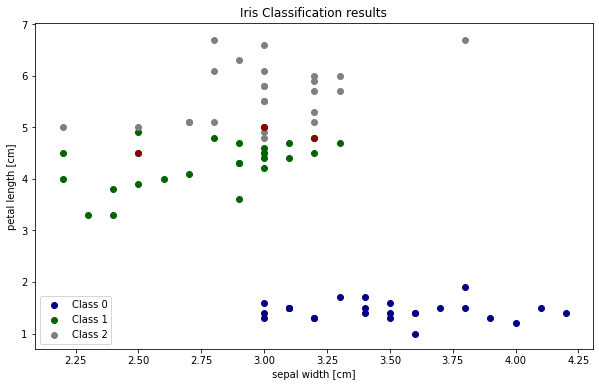

In [54]:
# Plot two dimensions
plt.figure(figsize=(10, 6))
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, 1], X_test[idx, 2], color=color, label="Class %s" % str(n))

plt.scatter(X_test[incorrect_idx, 1], X_test[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

### Analyzing the results

We can see that the errors occur in the area where green (class 1) and gray (class 2) overlap. This gives us insight about what features to add - any feature which helps separate class 1 and class 2 should improve classifier performance.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Print the true labels of 3 wrong predictions and modify the scatterplot code, which we used above, to visualize and distinguish these three samples with different markers in the 2D scatterplot. Can you explain why our classifier made these wrong predictions?
      </li>
    </ul>
</div>

In [55]:
# %load solutions/04_wrong-predictions.py

# Supervised Learning -- Classification

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

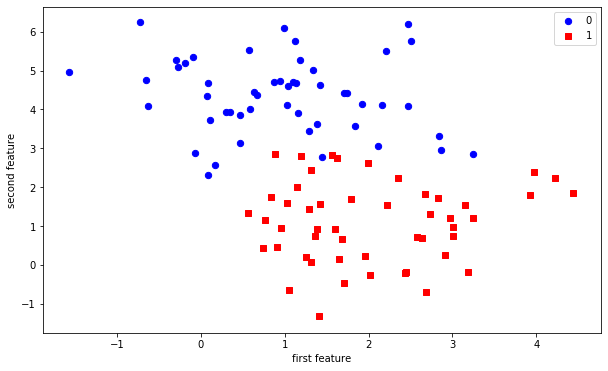

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a **training set** that the learning algorithm uses to fit the model
2. a **test set** to evaluate the generalization performance of the model

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.

<img src="http://www.snrazavi.ir/imgs/train_test_split_matrix.svg" width="75%">

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

### The scikit-learn estimator API
<img src="http://www.snrazavi.ir/imgs/supervised_workflow.svg" width="60%"/>


 - Every algorithm is exposed in scikit-learn via an ''Estimator'' object. 
 - All models in scikit-learn have a very consistent interface. 
 - For instance, we first import the logistic regression class.

In [59]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object.

In [60]:
clf = LogisticRegression()

In [61]:
print(X_train.shape)

(75, 2)


In [62]:
print(y_train.shape)

(75,)


To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [63]:
clf.fit(X_train, y_train)

/Users/mahrokh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [64]:
y_pred = clf.predict(X_test)

We can compare these against the true labels:

In [65]:
print(y_pred)  # predicted labels
print(y_test)  # true labels

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


### Accuracy
We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [66]:
print(np.mean(y_pred == y_test))

0.84


There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [67]:
print(clf.score(X_test, y_test))

0.84


It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [68]:
print(clf.score(X_train, y_train))

0.9466666666666667


### Linear Classification
Logistic Regression is a so-called **linear model**, that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

In [69]:
from fig_codes.plot_2d_separator import plot_2d_separator

plt.figure(figsize=(10, 6))
# plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

# plot decision bounary
plot_2d_separator(clf, X)

plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right');

ModuleNotFoundError: No module named 'fig_codes'

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [ ]:
print(clf.coef_)
print(clf.intercept_)

Another classifier: K Nearest Neighbors
------------------------------------------------
Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for ``LogisticRegression above``.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

We fit the model with out training data

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(10, 6))

# plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

# plot decision boundary
plot_2d_separator(knn, X)

plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right');

In [ ]:
print(knn.score(X_test, y_test))

## Tunning Hyper-parameters

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.
      </li>
    </ul>
</div>

In [ ]:
# %load solutions/05A_knn_with_diff_k.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=1234,
                                                            stratify=y_train)

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(X_trainsub, y_trainsub).\
        score(X_trainsub, y_trainsub)
    valid_score = knn.score(X_valid, y_valid)
    print('k: %d, Train/Valid Acc: %.3f/%.3f' %
          (k, train_score, valid_score))


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('\n\nk=9 Test Acc: %.3f' % knn.score(X_test, y_test))


# Supervised Learning -- Regression

In regression we are trying to predict a **continuous output variable** -- in contrast to the nominal variables we were predicting in the previous classification examples. 

Let's start with a simple toy example with one feature dimension (explanatory variable) and one target variable. We will create a dataset out of a sine curve with some noise:

In [ ]:
x = np.linspace(-3, 3, 100)
print(x[:10])

In [ ]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

In [ ]:
plt.plot(x, y, 'o');

Linear Regression
=================

The first model that we will introduce is the so-called simple linear regression. Here, we want to fit a line to the data, which 

One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is `LinearRegression` (also known as [*Ordinary Least Squares (OLS)*](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classe

As we remember, the scikit-learn API requires us to provide the target variable (`y`) as a 1-dimensional array; scikit-learn's API expects the samples (`X`) in form a 2-dimensional array -- even though it may only consist of 1 feature. Thus, let us convert the 1-dimensional `x` NumPy array into an `X` array with 2 axes:

In [ ]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

After fitting to the training data, we paramerterized a linear regression model with the following values.

In [ ]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept}.$$

Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

In [ ]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

Similar to the estimators for classification in the previous notebook, we use the `predict` method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details.

Next, let's try the test set:

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [ ]:
regressor.score(X_test, y_test)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Add a feature containing  `sin(4x)` to `X` and redo the fit. Visualize the predictions with this new richer, yet linear, model.
      </li>
    </ul>
</div>

In [ ]:
# %load solutions/06B_lin_with_sine.py
XX_train = np.concatenate((X_train, np.sin(4 * X_train)), axis=1)
XX_test = np.concatenate((X_test, np.sin(4 * X_test)), axis=1)
regressor.fit(XX_train, y_train)
y_pred_test_sine = regressor.predict(XX_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test_sine, 'o', label="prediction with sine")
plt.plot(X_test, y_pred_test, label='prediction without sine')
plt.legend(loc='best');


KNeighborsRegression
=======================
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

Again, let us look at the behavior on training and test set:

In [ ]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor!

In [ ]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the test set, we also do a better job of capturing the variation, but our estimates look much messier than before.
Let us look at the R<sup>2</sup> score:

In [ ]:
print(kneighbor_regression.score(X_test, y_test))

Much better than before! Here, the linear model was not a good fit for our problem; it was lacking in complexity and thus under-fit our data.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``. You can learn about the dataset by reading the ``DESCR`` attribute.
      </li>
    </ul>
</div>

In [ ]:
# %load solutions/06A_knn_vs_linreg.py
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


boston = load_boston()
X = boston.data
y = boston.target

print('X.shape:', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=1)

linreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' %
      (linreg.score(X_train, y_train),
       linreg.score(X_test, y_test)))

knnreg.fit(X_train, y_train)
print('KNeighborsRegressor Train/Test: %.3f/%.3f' %
      (knnreg.score(X_train, y_train),
       knnreg.score(X_test, y_test)))
